## reinforcement learning
 - agent가 최적의 목표에 해당하는 state를 찾는 학습 방법
 
 ### 주요 용어
 - agent : 학습하는 프로그램. 
 - State : 현재 시점의 상황
 - Action : 취할 수 있는 선택지
 - Reward : action에 대한 피드백
 
 
 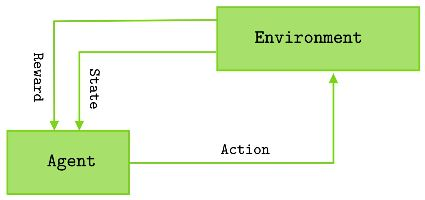 


## Supervised vs Reinforment
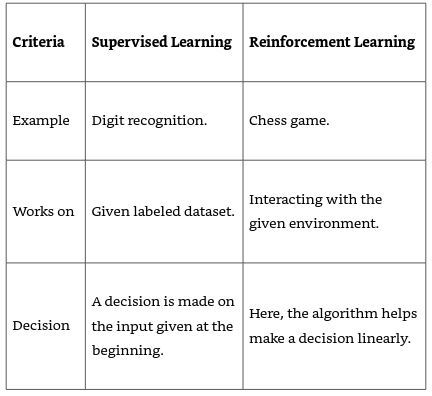


## Applications of reinforcement learning
- Text mining : RL-based text generation model to produce highly readable text summaries from long text.
- Robotics : enhance the performance of robotics based on the reward system.
- Healthcare : RL can be used in healthcare to optimize medication dosage and treatment policies.
- Trading : trading businesses to optimize trading outcomes.

### Textming sample
- 주제와 맞지 않지만..

**환경구성**
- python 3.8 (3.9에서 실패로 3.8로 다운그레이드)
- VC_redist_x64.exe
- jdk (8이상)

** library **
- pip install --upgrade pip
- pip install konlpy
- pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl
- 이 외, pytagcloud, pygame .. 필요한 라이브러리 설치

[레퍼런스]
https://joyfuls.tistory.com/67?category=731429

In [17]:
from konlpy.tag import Kkma

# object 생성
kkma = Kkma()

In [27]:
# 1. text file 읽기
file = open("../data/text_data.txt", mode='r', encoding='utf-8')
doc = file.read()
file.close()
print(doc)

형태소 분석을 시작합니다. 오늘은 강화학습을 준비했습니다.
강화학습은 텍스트 마이닝에 활용됩니다. 


In [30]:
# 2. doc -> sentence (문장)
ex_sent = kkma.sentences(doc)
print(ex_sent)

['형태소 분석을 시작합니다.', '오늘은 강화학습을 준비했습니다.', '강화학습은 텍스트 마이닝에 활용됩니다.']


In [29]:
# 3. doc -> noun (단어)
ex_nouns = kkma.nouns(doc)
print(ex_nouns)

['형태소', '분석', '오늘', '강화', '강화학습', '학습', '준비', '텍스트', '마이닝', '활용']


In [31]:
# 4. sentence(문장) -> noun (단어)
from re import match  # 전처리 위해서 정규표현식 관련 re 패키지 import

nouns = []
for sent in ex_sent
    for noun in kkma.nouns(sent):
        # 단어 전처리 : 2음절 이상, 조사 제외
        if len(str(noun)) >= 2 and not (match('^[0-9]', noun)):
            nouns.append(noun)
print(nouns)

['형태소', '분석', '오늘', '강화', '강화학습', '학습', '준비', '강화', '강화학습', '학습', '텍스트', '마이닝', '활용']


In [32]:
# 5. word count : dict
word_count = {}  # 빈 set

for noun in nouns:
    word_count[noun] = word_count.get(noun, 0) + 1
print(word_count)

{'형태소': 1, '분석': 1, '오늘': 1, '강화': 2, '강화학습': 2, '학습': 2, '준비': 1, '텍스트': 1, '마이닝': 1, '활용': 1}


In [33]:
# 6. top_n
from collections import Counter

counter = Counter(word_count)

top5 = counter.most_common(5)
print(top5)

[('강화', 2), ('강화학습', 2), ('학습', 2), ('형태소', 1), ('분석', 1)]


In [24]:
# 7. word cloud

import pytagcloud
import webbrowser

# tag에 color, size, tag 사전 구성
word_count_list = pytagcloud.make_tags(top5, maxsize=80)
# maxsize : 최대 글자크기
print(word_count_list)

pytagcloud.create_tag_image(word_count_list,
                            'wordcloud.jpg',  # 생성될 시각화 파일 이름
                            size=(900, 600),  # 사이즈
                            fontname='korean',  # 한글 시각화를 위해 새로 추가했던 폰트 이름

                            rectangular=False)

webbrowser.open('wordcloud.jpg')  # 저장된 'wordcloud.jpg' 브라우저로 띄워서 보기

[{'color': (11, 168, 86), 'size': 137, 'tag': '강화'}, {'color': (173, 20, 174), 'size': 137, 'tag': '강화학습'}, {'color': (28, 11, 89), 'size': 137, 'tag': '학습'}, {'color': (216, 99, 142), 'size': 80, 'tag': '형태소'}, {'color': (205, 174, 173), 'size': 80, 'tag': '분석'}]


True

## 결과
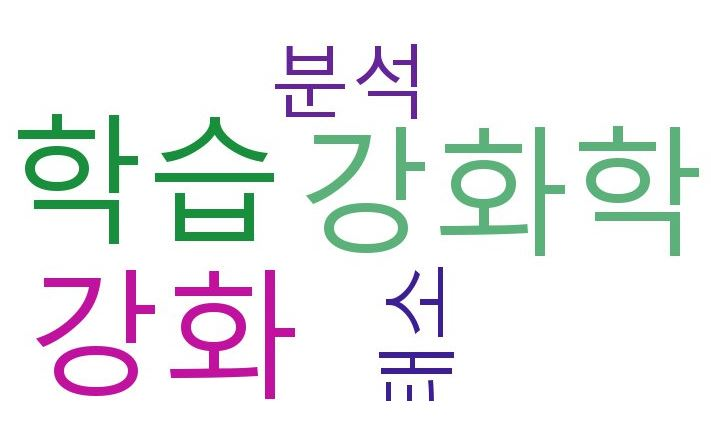